In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import piplite
await piplite.install(['pandas','matplotlib','scikit-learn','seaborn', 'numpy'])


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [6]:
await download(file_name, "kc_house_data_NaN.csv")
file_name="kc_house_data_NaN.csv"

In [7]:
df = pd.read_csv(file_name)

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [34]:
df.drop('id', axis = 1, inplace = True)

In [40]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
print('number of nan values for the columns bedrooms :', df['bedrooms'].isnull().sum())
print('number of nan values fro the column bedrooms :', df['bathrooms'].isnull().sum())

number of nan values for the columns bedrooms : 13
number of nan values fro the column bedrooms : 10


In [45]:
df.mean()

price            540088.141767
bedrooms              3.372870
bathrooms             2.115736
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
lat                  47.560053
long               -122.213896
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [48]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace = True)

In [55]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [56]:
print('number of nan values for the columns bedrooms :', df['bedrooms'].isnull().sum())
print('number of nan values fro the column bedrooms :', df['bathrooms'].isnull().sum())

number of nan values for the columns bedrooms : 0
number of nan values fro the column bedrooms : 0


## Exploratory Data Analysis

In [59]:
# use value_counts to count the number of houses with unique floor values.
# Use method .to_frame() to convert it to a dataframe


df[['floors']].value_counts()
df[['floors']].value_counts().to_frame()


,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

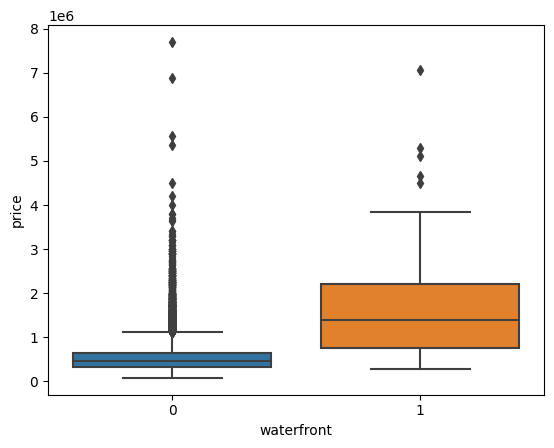

In [70]:
# use the boxplot in the seaborn library to determine whether 
# houses with a waterfront view or without a view hav more price outliers

sns.boxplot(x='waterfront', y= 'price', data=df)


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

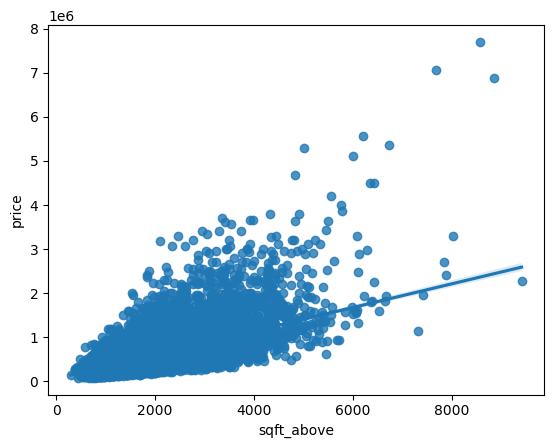

In [72]:
# use the regplot in the seaborn library to determine if the feature
# sqft_above is negatively or positively correlated with price 

sns.regplot(x=df['sqft_above'], y=df['price'], data=df)



In [74]:
# using pandas .corr() to find the feature other than price
# this is most correlated with price

df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Model Development  

In [82]:
# firt the linear regression medel using the  longitude feature
# 'long' an calculate the R^2

X = df[['long']]
y = df[['price']]
lm = LinearRegression()
lm.fit(X,y)
print('R^2 Equals', lm.score(X,y))

R^2 Equals 0.00046769430149007363


In [81]:
# fit a linear Regression model to prdict the 'price' using 
# the feature 'sqft_living' then calculate the R^2. 

X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X,Y)
print('R^2 Equals', lm.score(X,Y))

R^2 Equals 0.4928532179037931


In [92]:
# Fit Linea regression model topredict the price using the list of features

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
yhat = lm.predict(X)
yhat[0:5]

array([[537658.05923445],
       [534162.64042347],
       [539011.12458064],
       [529990.68893939],
       [549610.13645911]])

In [97]:
print('R^2 is', lm.score(X,Y))

R^2 is 0.00046769430149007363


In [101]:
# Crearte a list of Tuples that contains the name of the estimator 

Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)),('model', LinearRegression())]

In [117]:
# use the list above to create a pipleine to predict the price
# fit the object using the features in the list features and calculate the R^2

pipe = Pipeline(Input)
pipe.fit(X,Y)

ypipe = pipe.predict(X)
ypipe[0:4]


array([[545993.98879169],
       [531308.97833637],
       [550313.20218595],
       [507124.51425902]])

In [118]:
print('R^2 is', pipe.score(X,Y))

R^2 is 0.003360798516638175


## Model Evaluation and Refinement 

In [120]:
# import models

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print('done')

done


In [123]:
# split data into training and testing 

features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train,y_train,x_test,_y_test = train_test_split(X,Y, test_size=0.15, random_state=1)

print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 18371
number of training samples: 18371


In [134]:
# Create a Ridge Regression object using the training data, set
# the regularization permater to 0.1 and calculate the R^2 suing the data

from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=.1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)


<class 'NameError'>: name 'x_train_pr' is not defined

In [137]:
# Perform second order polynomial transform on both the training data and testing data. 
# create the fir ridge regressing object using training data,
# set the regulation perameter to 0.1 and calculate the R^2 utilizing the test data
# take a screenshot of oyur code and the R^2.

pr = PolynomialFeatures(degree=2)
x_test_pr = pr.fit_transform(x_test[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])
x_train_pr = pr.fit_transform(x_train[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]])

RidgeModel = Ridge(alpha=.1)
RideModel.fit(x_train_pr, y_train)
RidgeModel.score()

<class 'KeyError'>: "None of [Index(['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view',\n       'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living'],\n      dtype='object')] are in the [index]"